<a href="https://www.kaggle.com/code/vedatgul/measurement-problems-rating-product-sorting-rev?scriptVersionId=123553050" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

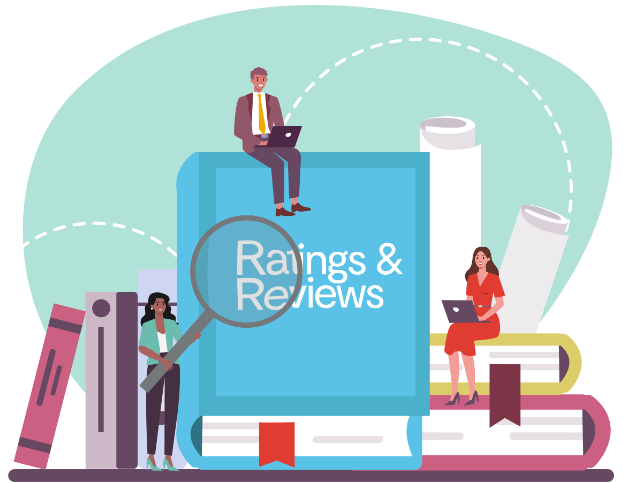

One of the most important problems in e-commerce is selling products.
is the correct calculation of the points given after This
solution to the problem more customers for e-commerce site
satisfaction, prominence of the product for the sellers and
It means a hassle-free shopping experience for buyers. Another
The problem is that the comments given to the products are not correct.
appears in order. Feature misleading comments
as it will directly affect the sale of the product.
It will cause both financial loss and loss of customers. These 2 basics
In solving the problem, e-commerce site and vendors increase their sales.
customers while increasing their purchasing journey without any problems.
will complete.

**Dataset Story**

**reviewerID**    : User ID 

**asin**         : Product ID

**reviewerName**  : Username

**helpful**       : Useful rating

**reviewText**    : Review

**overall**       : Product rating

**summary**       : Evaluation summary

**unixReviewTime**: Evaluation time

**reviewTime**    : Reviewtime Raw

**day_diff**      : Number of days since evaluation

**helpful_yes**   : The number of times the evaluation was found helpful

**total_vote**    : The number of votes given to the rating


In [1]:
import numpy as np
import pandas as pd
import math
import scipy.stats as st
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
# Reading the dataset
df = pd.read_csv("/kaggle/input/e-comm/e-commerce.csv")
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.00000,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.00000,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.00000,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.00000,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.00000,best deal around,1373673600,2013-07-13,513,0,0


In [3]:
# Product rating average

df['overall'].mean()

4.587589013224822

In [4]:
# Calculation of Weighted Average of Score by Date

a = df["day_diff"].quantile(0.25)
b = df["day_diff"].quantile(0.50)
c = df["day_diff"].quantile(0.75)

df.loc[df["day_diff"] <= a, "overall"].mean() * 28/100 + \
    df.loc[(df["day_diff"] > a) & (df["day_diff"] <= b), "overall"].mean() * 26/100 + \
    df.loc[(df["day_diff"] > b) & (df["day_diff"] <= c), "overall"].mean() * 24/100 + \
    df.loc[(df["day_diff"] > c), "overall"].mean() * 22/100


4.595593165128118

In [5]:
# Finding the number of votes not useful by subtracting the number of useful votes from the total number of votes

df["helpful_no"] = df["total_vote"] - df["helpful_yes"]
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,helpful_no
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.00000,Four Stars,1406073600,2014-07-23,138,0,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.00000,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.00000,nothing to really say....,1356220800,2012-12-23,715,0,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.00000,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.00000,best deal around,1373673600,2013-07-13,513,0,0,0


*In an environment where reviews are so important (selling, buying or discouraging), the accuracy of reviews is also a very important issue. These reviews may mislead the customer and may affect the purchase decision of the customer. As we said, the wisdom of the masses is here: Did you find this comment helpful?

**In the review sorting section, we’ll cover 3 different methods:**

• Useful-Useless Difference (Up-Down Diff Score)

• Useful Rate

• Wilson Lower Bound*

In [6]:
# Score pos/neg diff method

def score_pos_neg_diff(pos, neg):
    return pos - neg

df["score_pos_neg_diff"] = df.apply(lambda x: score_pos_neg_diff(x["helpful_yes"],
                                                                 x["helpful_no"]),
                                                                   axis=1)

In [7]:
# Score average rating metod

def score_average_rating(pos, neg):
    if pos + neg == 0:
        return 0
    return pos / (pos + neg)


df["score_average_rating"] = df.apply(lambda x: score_average_rating(x["helpful_yes"],
                                                                     x["helpful_no"]),
                                                                     axis=1)

The lower limit of the confidence interval to be calculated for the Bernoulli Parameter p is accepted as the WLB score. This lower bound provides a method for ranking a product (review) by positive and negative ratings. In other words, WLB can be used to predict what the entire community thinks of that product by choosing a subset of evaluations for a product.

Sorting by **Wilson Lower Bound** score also made negative reviews appear in the product reviews section.

In [8]:
# Wilson lower bound method

def wilson_lower_bound(pos, neg, confidence=0.95):

    n = pos + neg
    if n == 0:
        return 0
    z = st.norm.ppf(1 - (1 - confidence) / 2)
    phat = 1.0 * pos / n
    return (phat + z * z / (2 * n) - z * math.sqrt((phat * (1 - phat) + z * z / (4 * n)) / n)) / (1 + z * z / n)

df["wilson_lower_bound"] = df.apply(lambda x: wilson_lower_bound(x["helpful_yes"],
                                                                 x["helpful_no"]),axis=1)

In [9]:
df.sort_values("wilson_lower_bound", ascending=False).head(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,helpful_no,score_pos_neg_diff,score_average_rating,wilson_lower_bound
2031,A12B7ZMXFI6IXY,B007WTAJTO,"Hyoun Kim ""Faluzure""","[1952, 2020]",[[ UPDATE - 6/19/2014 ]]So my lovely wife boug...,5.00000,UPDATED - Great w/ Galaxy S4 & Galaxy Tab 4 10...,1367366400,2013-01-05,702,1952,2020,68,1884,0.96634,0.95754
3449,AOEAD7DPLZE53,B007WTAJTO,NLee the Engineer,"[1428, 1505]",I have tested dozens of SDHC and micro-SDHC ca...,5.00000,Top of the class among all (budget-priced) mic...,1348617600,2012-09-26,803,1428,1505,77,1351,0.94884,0.93652
4212,AVBMZZAFEKO58,B007WTAJTO,SkincareCEO,"[1568, 1694]",NOTE: please read the last update (scroll to ...,1.00000,1 Star reviews - Micro SDXC card unmounts itse...,1375660800,2013-05-08,579,1568,1694,126,1442,0.92562,0.91214
317,A1ZQAQFYSXL5MQ,B007WTAJTO,"Amazon Customer ""Kelly""","[422, 495]","If your card gets hot enough to be painful, it...",1.00000,"Warning, read this!",1346544000,2012-02-09,1033,422,495,73,349,0.85253,0.81858
4672,A2DKQQIZ793AV5,B007WTAJTO,Twister,"[45, 49]",Sandisk announcement of the first 128GB micro ...,5.00000,Super high capacity!!! Excellent price (on Am...,1394150400,2014-07-03,158,45,49,4,41,0.91837,0.80811
